# Investigate Titanic Dataset

## Explore Datasets

In [2]:
#Imports and exploring
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
%pylab inline

path = 'titanic_data.csv'
titanic_df = pd.read_csv(path)
titanic_df.info()
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


<h2> Initial hypothesis </h2>

1. Female, children are more likely to survive.
2. Survival Situtaion in Pclass and the age distribution within Pclass. 
3. Which port has most people boarding, and whether survival rate varies by boarding locations.


      Sex  Survived  PassengerId
0  female         0           81
1  female         1          233
2    male         0          468
3    male         1          109
577

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "



0    468
1    109
Name: Survived, dtype: int64
0    0.811092
1    0.188908
Name: Survived, dtype: float64
314
1    233
0     81
Name: Survived, dtype: int64
0    0.257962
1    0.742038
Name: Survived, dtype: float64


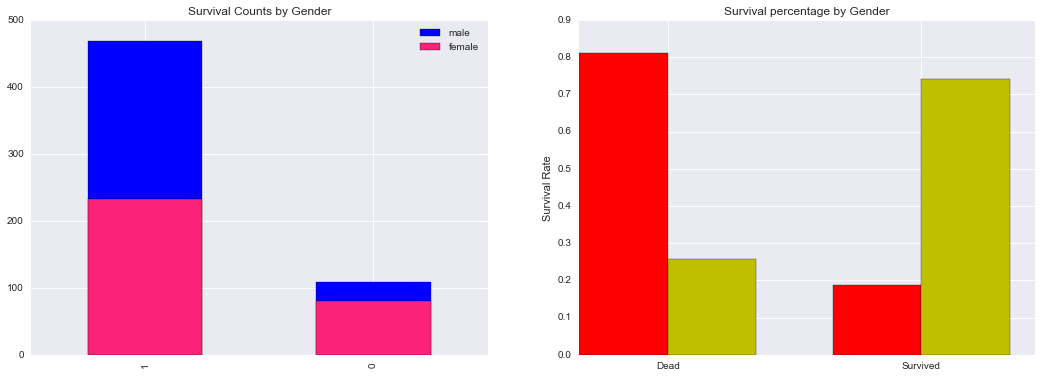

In [3]:
#Gender

grouped_gender = titanic_df.groupby(['Sex', 'Survived'], as_index = False)['PassengerId'].count()
print grouped_gender


# Params of graph
fig = plt.figure(figsize = (18, 6))


ax1 = fig.add_subplot(121)
titanic_df['Survived'][titanic_df['Sex']=='male'].value_counts().plot(kind='bar', label='male')
titanic_df['Survived'][titanic_df['Sex']=='female'].value_counts().plot(kind='bar',color='#FA2379', label='female')
plt.title("Survival Counts by Gender"); plt.legend(loc='best')


#display proportion instead of raw values
Total_man = titanic_df['Survived'][titanic_df['Sex']=='male'].size
Man_by_survival = titanic_df['Survived'][titanic_df['Sex']=='male'].value_counts()
Survival_men = (Man_by_survival/Total_man)
print Total_man
print Man_by_survival
print Survival_men

Total_woman = titanic_df['Survived'][titanic_df['Sex']=='female'].size
Women_by_survival = titanic_df['Survived'][titanic_df['Sex']=='female'].value_counts()
Survival_woman = (Women_by_survival/Total_woman)
Survival_woman.sort()
print Total_woman
print Women_by_survival
print Survival_woman

ax2 = fig.add_subplot(122)
index = np.arange(2)
width = 0.35 

rects1 = ax2.bar(index, Survival_men, width, color='r')
rects2 = ax2.bar(index+width, Survival_woman, width, color='y')
ax2.set_ylabel('Survival Rate')
ax2.set_title('Survival or Dead')
ax2.set_xticks(index+width)
ax2.set_xticklabels( ('Dead', 'Survived') )
plt.title('Survival percentage by Gender'); plt.legend(loc='best')

The first graph shows survival counts of male and female, the second graph shows the survival percentage of male and female, women is around 74%, men is around 18% We could conclude that female are more likely to survive than male.

<h3> Chi-square test for gender </h3>
 
 Ho = Gender and Survival chance are independent. <BR>
 Ha = Gender and Survival Chance are not independent.

Significance Level = 95%

#Save for later

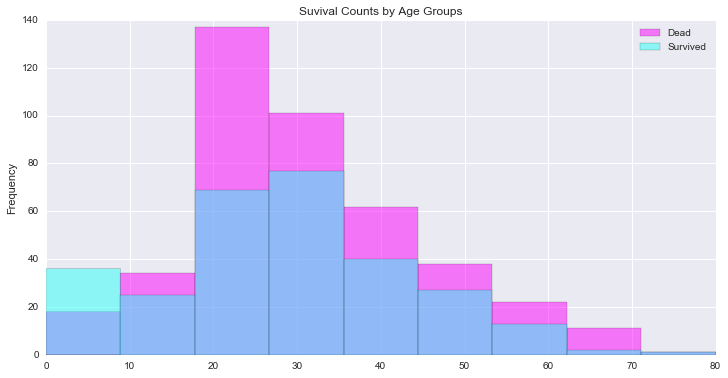

In [4]:
# children and adults

# Distribition of survived/non-survived passengers by age groups

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)

titanic_df['Age'][titanic_df['Survived']==0].plot(kind='hist', bins=np.linspace(0, 80, 10), alpha=0.5, label='Dead', color='#FF00FF')
titanic_df['Age'][titanic_df['Survived']==1].plot(kind='hist', bins=np.linspace(0, 80, 10), alpha=0.5, label='Survived', color='#2EFEF7')

plt.title("Suvival Counts by Age Groups")
plt.legend(loc = "upper right")

From above hitogram, we can tell that children(roughly under the age of 16) are most likely to survive. Only this age group have more people survived than dead.

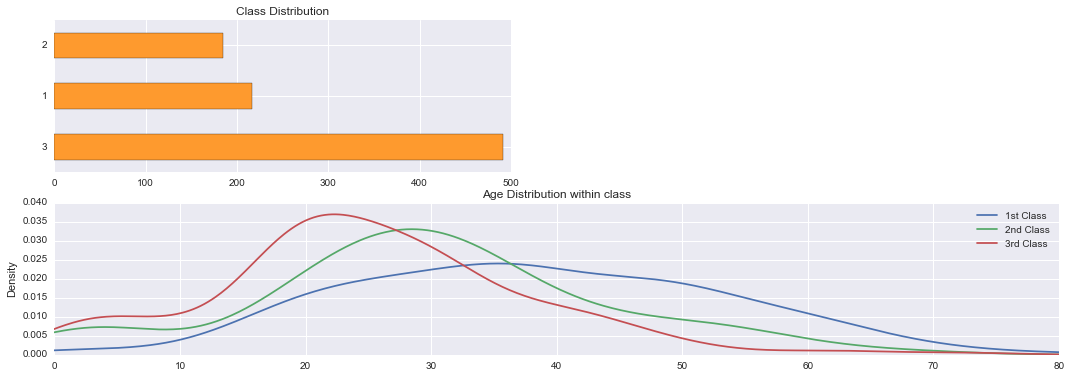

In [5]:
# Pclass Distribution
fig=plt.figure(figsize=(18,6), dpi=1200)


ax1= fig.add_subplot(221)
titanic_df.Pclass.value_counts().plot(kind='barh', color='#FE9A2E')
plt.title("Class Distribution")

#Pclass and Age distribution
ax2 = fig.add_subplot(212)
titanic_df.Age[titanic_df.Pclass==1].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass==2].plot(kind='kde')
titanic_df.Age[titanic_df.Pclass==3].plot(kind='kde')
plt.title('Age Distribution within class')
plt.xlim([0,titanic_df.Age.max()])
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')


The first graph shows that Class 3 has the most people boarded with almost 500 people. Class 1 has the second, a bit over 200 people, class 2 has around 180 people boarded. The second graph shows the age distribution within each class. The peak of class3 is around 22, class2 around 28, class1 around 36.   

<h3> One Way ANOVA test for Pclass </h3>

Ho: Class1, Class2 and Class3 have the same population mean, which means the same chance of survival.<BR>
Ha: Class1, Class2 and Class3 don't have same population mean, which means not the same chance of survival.

Significance level: 95%


In [6]:
results = scipy.stats.f_oneway(titanic_df['Survived'][titanic_df['Pclass']==1],
                               titanic_df['Survived'][titanic_df['Pclass']==2],
                               titanic_df['Survived'][titanic_df['Pclass']==3])

F = results[0]
P = results[1]
print F
print P

57.9648175909
2.18324741512e-24


The p value of the above one way ANOVA test is far below the significance level 0.05. Thus, we can reject the null hypothese and accept the alternative hypothesis that these 3 different Pclass have different population means, which translates to different chance of survival.

S    217
C     93
Q     30
Name: Embarked, dtype: int64
S    427
C     75
Q     47
Name: Embarked, dtype: int64


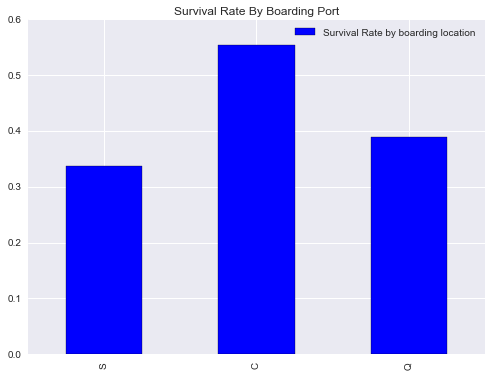

In [7]:

fig = plt.figure(figsize=(18,6), dpi=1600) 

ax1 = fig.add_subplot(122)

Survived = titanic_df.Embarked[titanic_df['Survived']==1].value_counts()
Died = titanic_df.Embarked[titanic_df['Survived']==0].value_counts()
Total = titanic_df.Embarked.value_counts()
(Survived/Total).plot(kind='bar', label='Survival Rate by boarding location')
plt.title('Survival Rate By Boarding Port'), plt.legend()

print titanic_df.Embarked[titanic_df['Survived']==1].value_counts()
print titanic_df.Embarked[titanic_df['Survived']==0].value_counts()



From the table we know that port C has the highest survival rate. Roughly 55% people boarded at port C has survived, the second is port Q, a little bit under 40%. The lowest is port S, with only 34%. 

<b> Reference
1. https://www.kaggle.com/malais/titanic/kaggle-first-ipythonnotebook/notebook
2. http://matplotlib.org/api/pyplot_api.html

